In [396]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict
%matplotlib inline
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
cmaps = OrderedDict()

In [397]:
plt.style.use('seaborn-dark-palette')

In [398]:
df = pd.read_csv(r'C:\Users\aaron\prem_league_analytics\data\clean_prem_players.csv')

In [399]:
df['player_position'] = df['player_positions'].str.split(',').str[0]
df['player_position'].unique()

array(['CB', '0', 'RB', 'CAM', 'LM', 'RW', 'RM', 'LW', 'LB', 'CM', 'CF',
       'ST', 'CDM', 'LWB', 'RWB', 'GK'], dtype=object)

In [400]:
df['player_position'] = df['player_position'].replace(to_replace =['RB', 'LB','LWB','RWB'], value='OB')
df['player_position'] = df['player_position'].replace(to_replace =['CAM','CDM', 'CM'], value='CM')
df['player_position'] = df['player_position'].replace(to_replace =['LM', 'RM', 'RW', 'LW'], value='W')
df['player_position'] = df['player_position'].replace(to_replace =['CF', 'ST'], value='ST')
df['player_position'] = df['player_position'].replace(to_replace =['GK'], value='GK')
df['player_position'] = df['player_position'].astype('str')

In [401]:
df['player_position'].unique()

array(['CB', '0', 'OB', 'CM', 'W', 'ST', 'GK'], dtype=object)

In [402]:
df['player_position_value'] = df['player_position']

In [403]:
df['player_position_value'] = df['player_position_value'].replace(to_replace =['GK'], value= 1)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['CB'], value= 2)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['OB'], value= 3)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['CM'], value= 4)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['W'], value= 5)
df['player_position_value'] = df['player_position_value'].replace(to_replace =['ST'], value= 6)

In [404]:
features = ['attacking_crossing',
'attacking_finishing',
'attacking_heading_accuracy',
'attacking_short_passing',
'attacking_volleys',
'skill_dribbling',
'skill_curve',
'skill_fk_accuracy',
'skill_long_passing',
'skill_ball_control',
'movement_acceleration',
'movement_sprint_speed',
'movement_agility',
'movement_reactions',
'movement_balance',
'power_shot_power',
'power_jumping',
'power_stamina',
'power_strength',
'power_long_shots',
'mentality_aggression',
'mentality_interceptions',
'mentality_positioning',
'mentality_vision',
'mentality_penalties',
'mentality_composure',
'defending_marking',
'defending_standing_tackle',
'defending_sliding_tackle',
'overall','goals', 'assists']

In [405]:
df[features] = df[features].apply(pd.to_numeric)

In [406]:
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['player_position_value']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [407]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-3.270765,-2.164194
1,-3.517926,-1.864947
2,-3.411034,-1.868319
3,-3.663187,-2.139183
4,-3.400502,-2.167475
5,8.366674,0.358625
6,8.362560,0.203139
7,-5.297147,-0.768641
8,8.361339,0.080964
9,8.361339,0.080964


In [408]:
pca.explained_variance_ratio_

array([0.80055365, 0.08004547])

In [409]:
finalDf = pd.concat([principalDf, df[['player_position']]], axis = 1)
finalDf = finalDf[finalDf.player_position != '0']

In [410]:
finalDf.head()

,principal component 1,principal component 2,player_position
0,-3.270765,-2.164194,CB
1,-3.517926,-1.864947,CB
2,-3.411034,-1.868319,CB
3,-3.663187,-2.139183,CB
4,-3.400502,-2.167475,CB


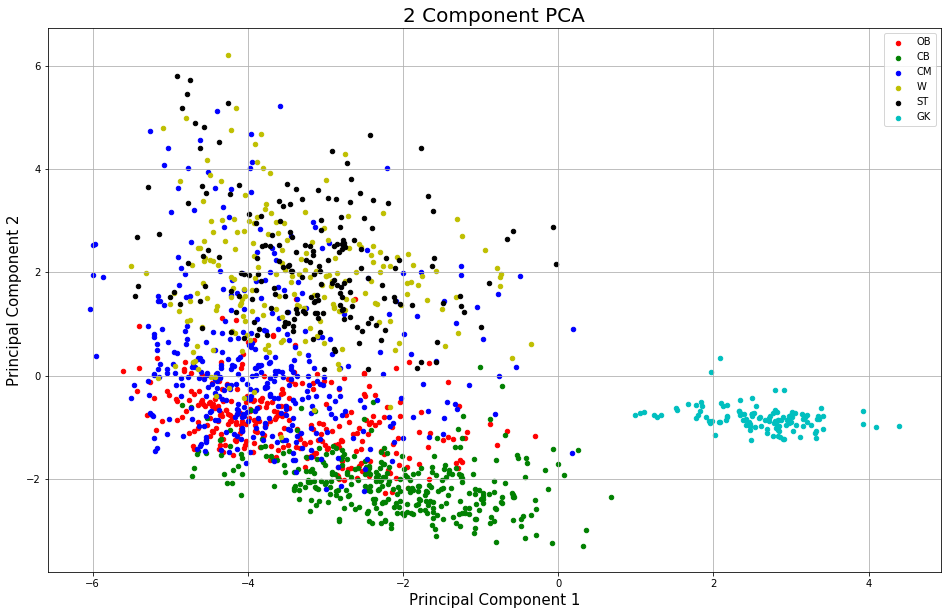

In [411]:
fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['OB', 'CB', 'CM', 'W', 'ST', 'GK']
colors = ['r', 'g', 'b', 'y','k','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['player_position'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()

In [412]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [413]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7)

clusters = kmeans.fit(principalDf)

In [414]:
finalDf['cluster'] = pd.Series(clusters.labels_, index=None)
finalDf

,principal component 1,principal component 2,player_position,cluster
0,-3.270765,-2.164194,CB,5
1,-3.517926,-1.864947,CB,5
2,-3.411034,-1.868319,CB,5
3,-3.663187,-2.139183,CB,5
4,-3.400502,-2.167475,CB,5
7,-5.297147,-0.768641,OB,5
10,-4.623372,4.556960,CM,0
11,-5.024348,4.411765,CM,0
12,-5.264748,4.732941,CM,0
13,-5.992309,2.534782,CM,0


In [415]:
finalDf['cluster'].value_counts()

5    409
2    355
4    247
6    219
0    165
3    125
Name: cluster, dtype: int64

In [416]:
#finalDf.loc[finalDf['cluster'] == 1]

In [417]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt

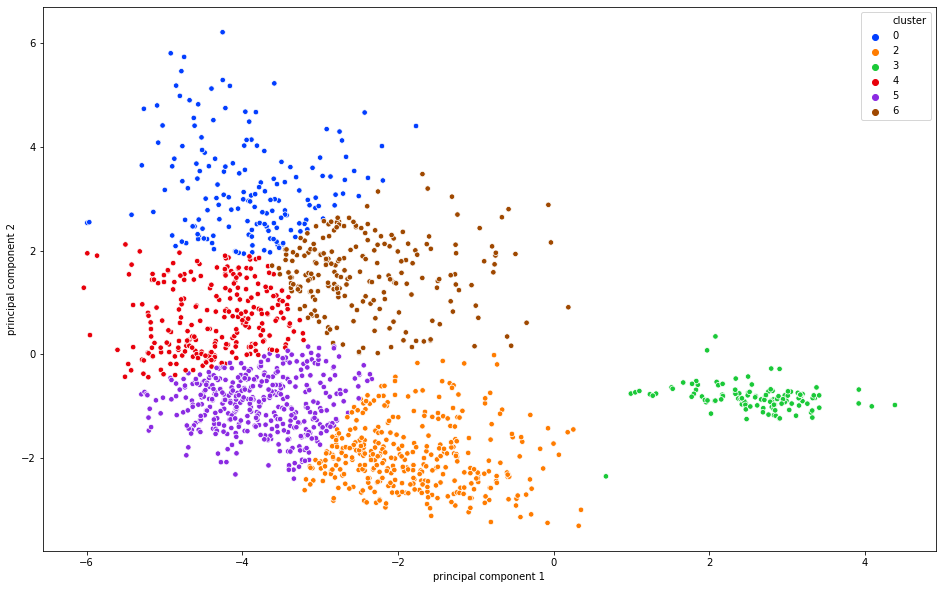

In [418]:
palette = sns.color_palette("bright", 6)  #Choosing color
plt.figure(figsize=(16, 10))


ax = sns.scatterplot(x="principal component 1", y="principal component 2", palette=palette, hue = 'cluster', s=30, data=finalDf)
plt.show()

In [142]:
#train = df[df['year'] != '19/20']
#train = train[train['player_position'] != '0']
train_feat = train[features]
train_feat

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,overall,goals,assists
0,52.0,53.0,86.0,64.0,58.0,43.0,50.0,39.0,66.0,60.0,74.0,76.0,71.0,80.0,62.0,69.0,90.0,78.0,82.0,56.0,85.0,86.0,49.0,45.0,44.0,0.0,87.0,86.0,88.0,84.0,1.0,0.0
1,52.0,53.0,86.0,64.0,56.0,41.0,50.0,39.0,66.0,60.0,68.0,75.0,71.0,79.0,62.0,69.0,90.0,78.0,82.0,56.0,85.0,86.0,49.0,45.0,44.0,76.0,83.0,86.0,86.0,85.0,1.0,3.0
2,52.0,53.0,83.0,71.0,56.0,41.0,50.0,39.0,66.0,64.0,62.0,64.0,69.0,78.0,62.0,69.0,86.0,76.0,80.0,56.0,90.0,85.0,49.0,45.0,44.0,84.0,81.0,83.0,84.0,83.0,5.0,0.0
3,52.0,54.0,85.0,75.0,57.0,49.0,50.0,39.0,72.0,70.0,59.0,61.0,64.0,79.0,62.0,69.0,92.0,67.0,80.0,56.0,91.0,86.0,51.0,53.0,45.0,84.0,85.0,87.0,86.0,86.0,1.0,1.0
10,90.0,82.0,53.0,88.0,82.0,85.0,78.0,77.0,82.0,86.0,76.0,78.0,78.0,87.0,75.0,84.0,65.0,85.0,73.0,85.0,68.0,52.0,83.0,88.0,77.0,0.0,30.0,39.0,40.0,86.0,17.0,15.0
11,90.0,82.0,53.0,88.0,82.0,85.0,78.0,77.0,82.0,86.0,76.0,78.0,78.0,87.0,75.0,84.0,65.0,85.0,73.0,85.0,68.0,52.0,83.0,88.0,77.0,82.0,30.0,39.0,40.0,88.0,7.0,21.0
12,90.0,83.0,53.0,90.0,82.0,85.0,83.0,83.0,84.0,87.0,76.0,75.0,80.0,88.0,75.0,85.0,65.0,87.0,73.0,86.0,68.0,56.0,84.0,90.0,77.0,84.0,30.0,51.0,40.0,89.0,12.0,21.0
13,93.0,83.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,60.0,87.0,94.0,79.0,88.0,67.0,58.0,51.0,91.0,6.0,11.0
15,72.0,73.0,38.0,77.0,59.0,87.0,64.0,49.0,70.0,85.0,94.0,92.0,90.0,80.0,91.0,68.0,61.0,75.0,64.0,70.0,34.0,26.0,81.0,76.0,63.0,0.0,48.0,58.0,54.0,82.0,11.0,10.0
16,71.0,73.0,38.0,77.0,59.0,86.0,64.0,49.0,67.0,84.0,94.0,92.0,90.0,79.0,91.0,68.0,60.0,75.0,64.0,70.0,34.0,26.0,81.0,76.0,63.0,74.0,48.0,58.0,54.0,82.0,10.0,20.0


In [143]:
test_20 = df[df['year'] == '19/20']
test_20_feat = test_20[features20]
test_20_feat

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,creativity,threat,bps,overall,goals,assists
4,52.0,54.0,84.0,75.0,57.0,51.0,50.0,39.0,72.0,70.0,55.0,57.0,58.0,78.0,58.0,69.0,89.0,65.0,79.0,56.0,91.0,83.0,48.0,53.0,45.0,79.0,82.0,84.0,83.0,18.4,204.0,102.0,83.0,1.0,0.0
7,86.0,58.0,68.0,81.0,62.0,85.0,82.0,69.0,75.0,84.0,89.0,90.0,82.0,84.0,79.0,80.0,72.0,92.0,60.0,68.0,73.0,78.0,78.0,78.0,46.0,82.0,79.0,80.0,80.0,3.1,0.0,12.0,84.0,0.0,0.0
14,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,90.0,76.0,61.0,88.0,94.0,79.0,91.0,68.0,58.0,51.0,380.3,150.0,216.0,91.0,2.0,9.0
19,78.0,83.0,38.0,84.0,67.0,89.0,75.0,63.0,69.0,88.0,96.0,91.0,94.0,89.0,94.0,76.0,57.0,79.0,54.0,77.0,38.0,30.0,91.0,79.0,69.0,79.0,47.0,53.0,47.0,128.4,366.0,136.0,88.0,9.0,2.0
24,83.0,81.0,72.0,80.0,85.0,88.0,83.0,82.0,64.0,85.0,93.0,96.0,86.0,81.0,80.0,87.0,64.0,78.0,70.0,78.0,61.0,34.0,84.0,82.0,71.0,80.0,36.0,32.0,35.0,0.0,0.0,0.0,86.0,0.0,0.0
29,53.0,52.0,86.0,78.0,45.0,70.0,60.0,70.0,81.0,76.0,74.0,79.0,61.0,88.0,53.0,81.0,90.0,75.0,92.0,64.0,82.0,89.0,47.0,65.0,62.0,89.0,91.0,92.0,85.0,8.7,74.0,107.0,90.0,1.0,1.0
34,69.0,26.0,71.0,74.0,24.0,67.0,41.0,29.0,62.0,70.0,76.0,85.0,64.0,79.0,66.0,41.0,66.0,74.0,79.0,26.0,73.0,81.0,51.0,56.0,26.0,72.0,79.0,82.0,78.0,11.8,0.0,13.0,80.0,0.0,0.0
39,88.0,56.0,68.0,81.0,50.0,76.0,82.0,80.0,82.0,82.0,79.0,81.0,74.0,82.0,74.0,76.0,66.0,83.0,62.0,63.0,73.0,79.0,73.0,78.0,55.0,75.0,76.0,83.0,79.0,311.8,115.0,143.0,83.0,1.0,3.0
48,69.0,70.0,74.0,85.0,73.0,85.0,76.0,67.0,79.0,85.0,79.0,76.0,81.0,83.0,84.0,78.0,79.0,93.0,72.0,71.0,74.0,78.0,78.0,78.0,74.0,86.0,76.0,78.0,69.0,42.3,47.0,65.0,84.0,1.0,0.0
53,86.0,62.0,66.0,84.0,76.0,77.0,81.0,75.0,81.0,80.0,63.0,59.0,69.0,84.0,73.0,82.0,62.0,90.0,70.0,70.0,85.0,79.0,72.0,79.0,88.0,86.0,77.0,80.0,79.0,27.7,17.0,27.0,81.0,2.0,3.0


In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_feat)

# Apply transform to both the training set and the test set.
train_feat = scaler.transform(train_feat)
#test_20_feat = scaler.transform(test_20_feat)

In [145]:
arr = test_20_feat
scaler = MinMaxScaler(feature_range=(0, 1)).fit(arr)
test_20_feat = scaler.transform(test_20_feat)

In [146]:
from sklearn.decomposition import PCA

In [147]:
pca = PCA(.95)

In [148]:
pca.fit(train_feat)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [149]:
pca.n_components_

15

In [150]:
X = pca.transform(train_feat)
y = np.array(train['player_position_value'])
#y = np.array(test_20['player_position_value'])
#test_20_feat = pca.transform(test_20_feat)

In [151]:
from sklearn.cluster import KMeans

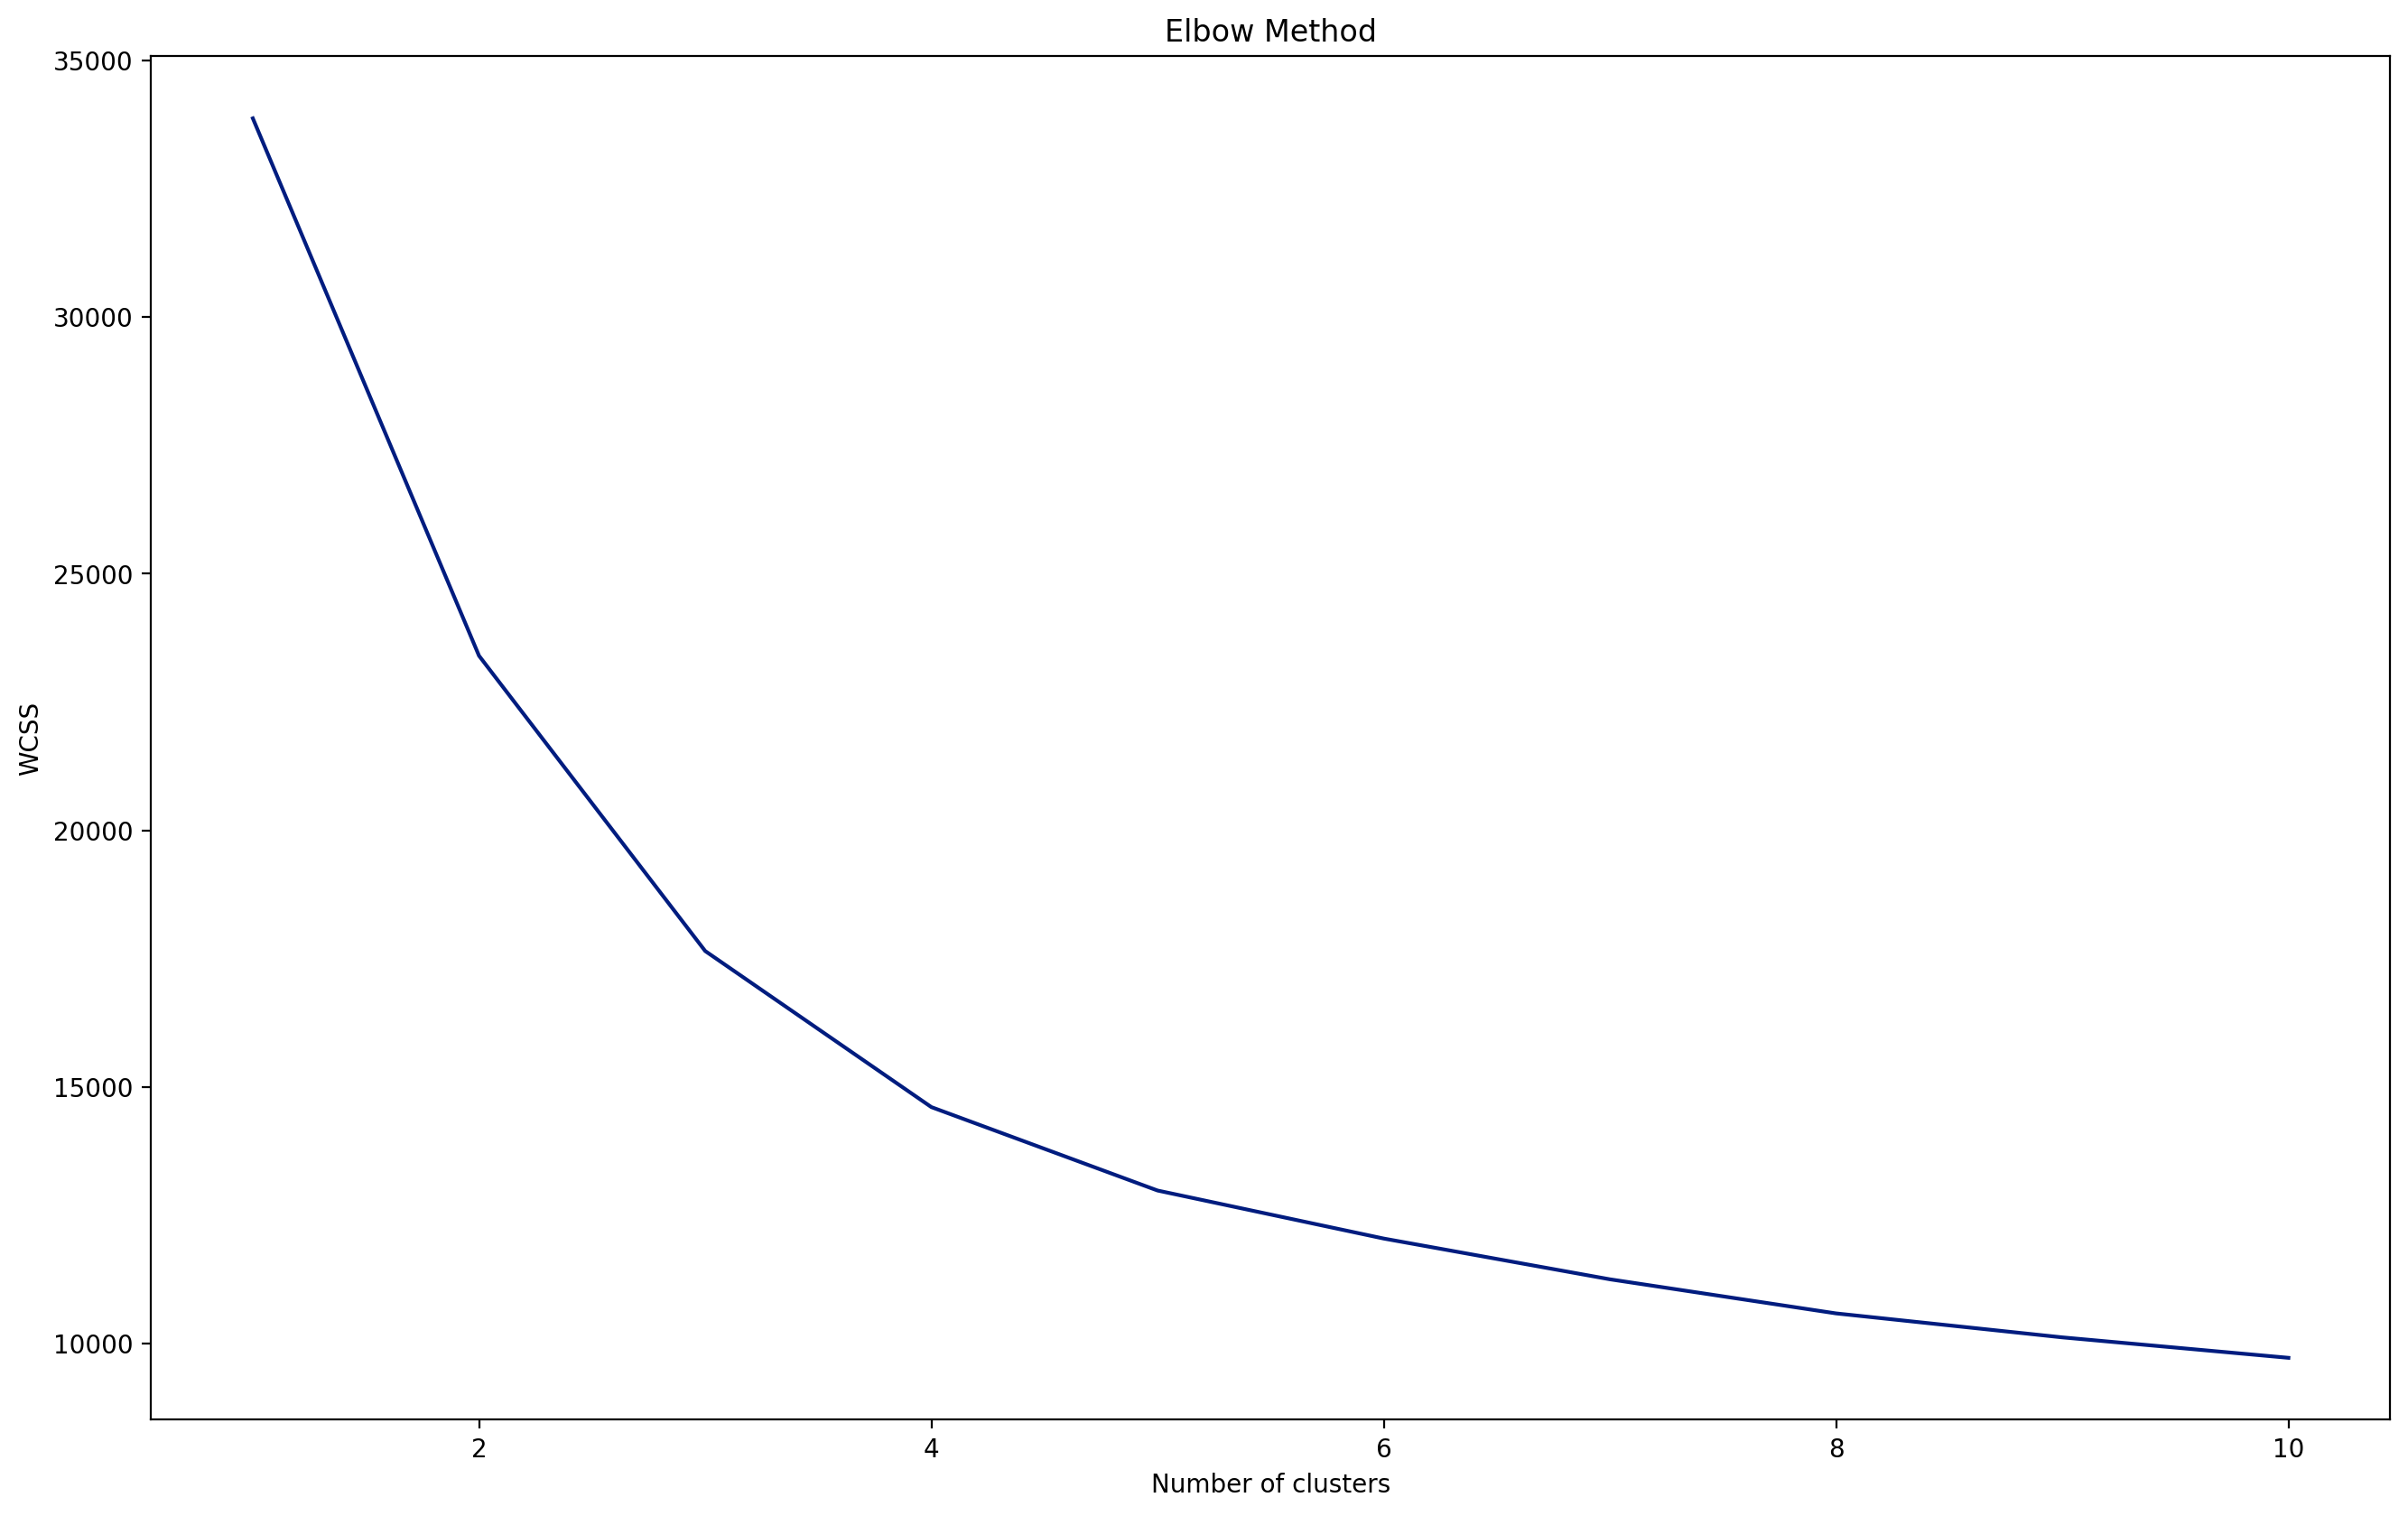

In [152]:
wcss = []
plt.figure(figsize=(16, 10), dpi=200)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

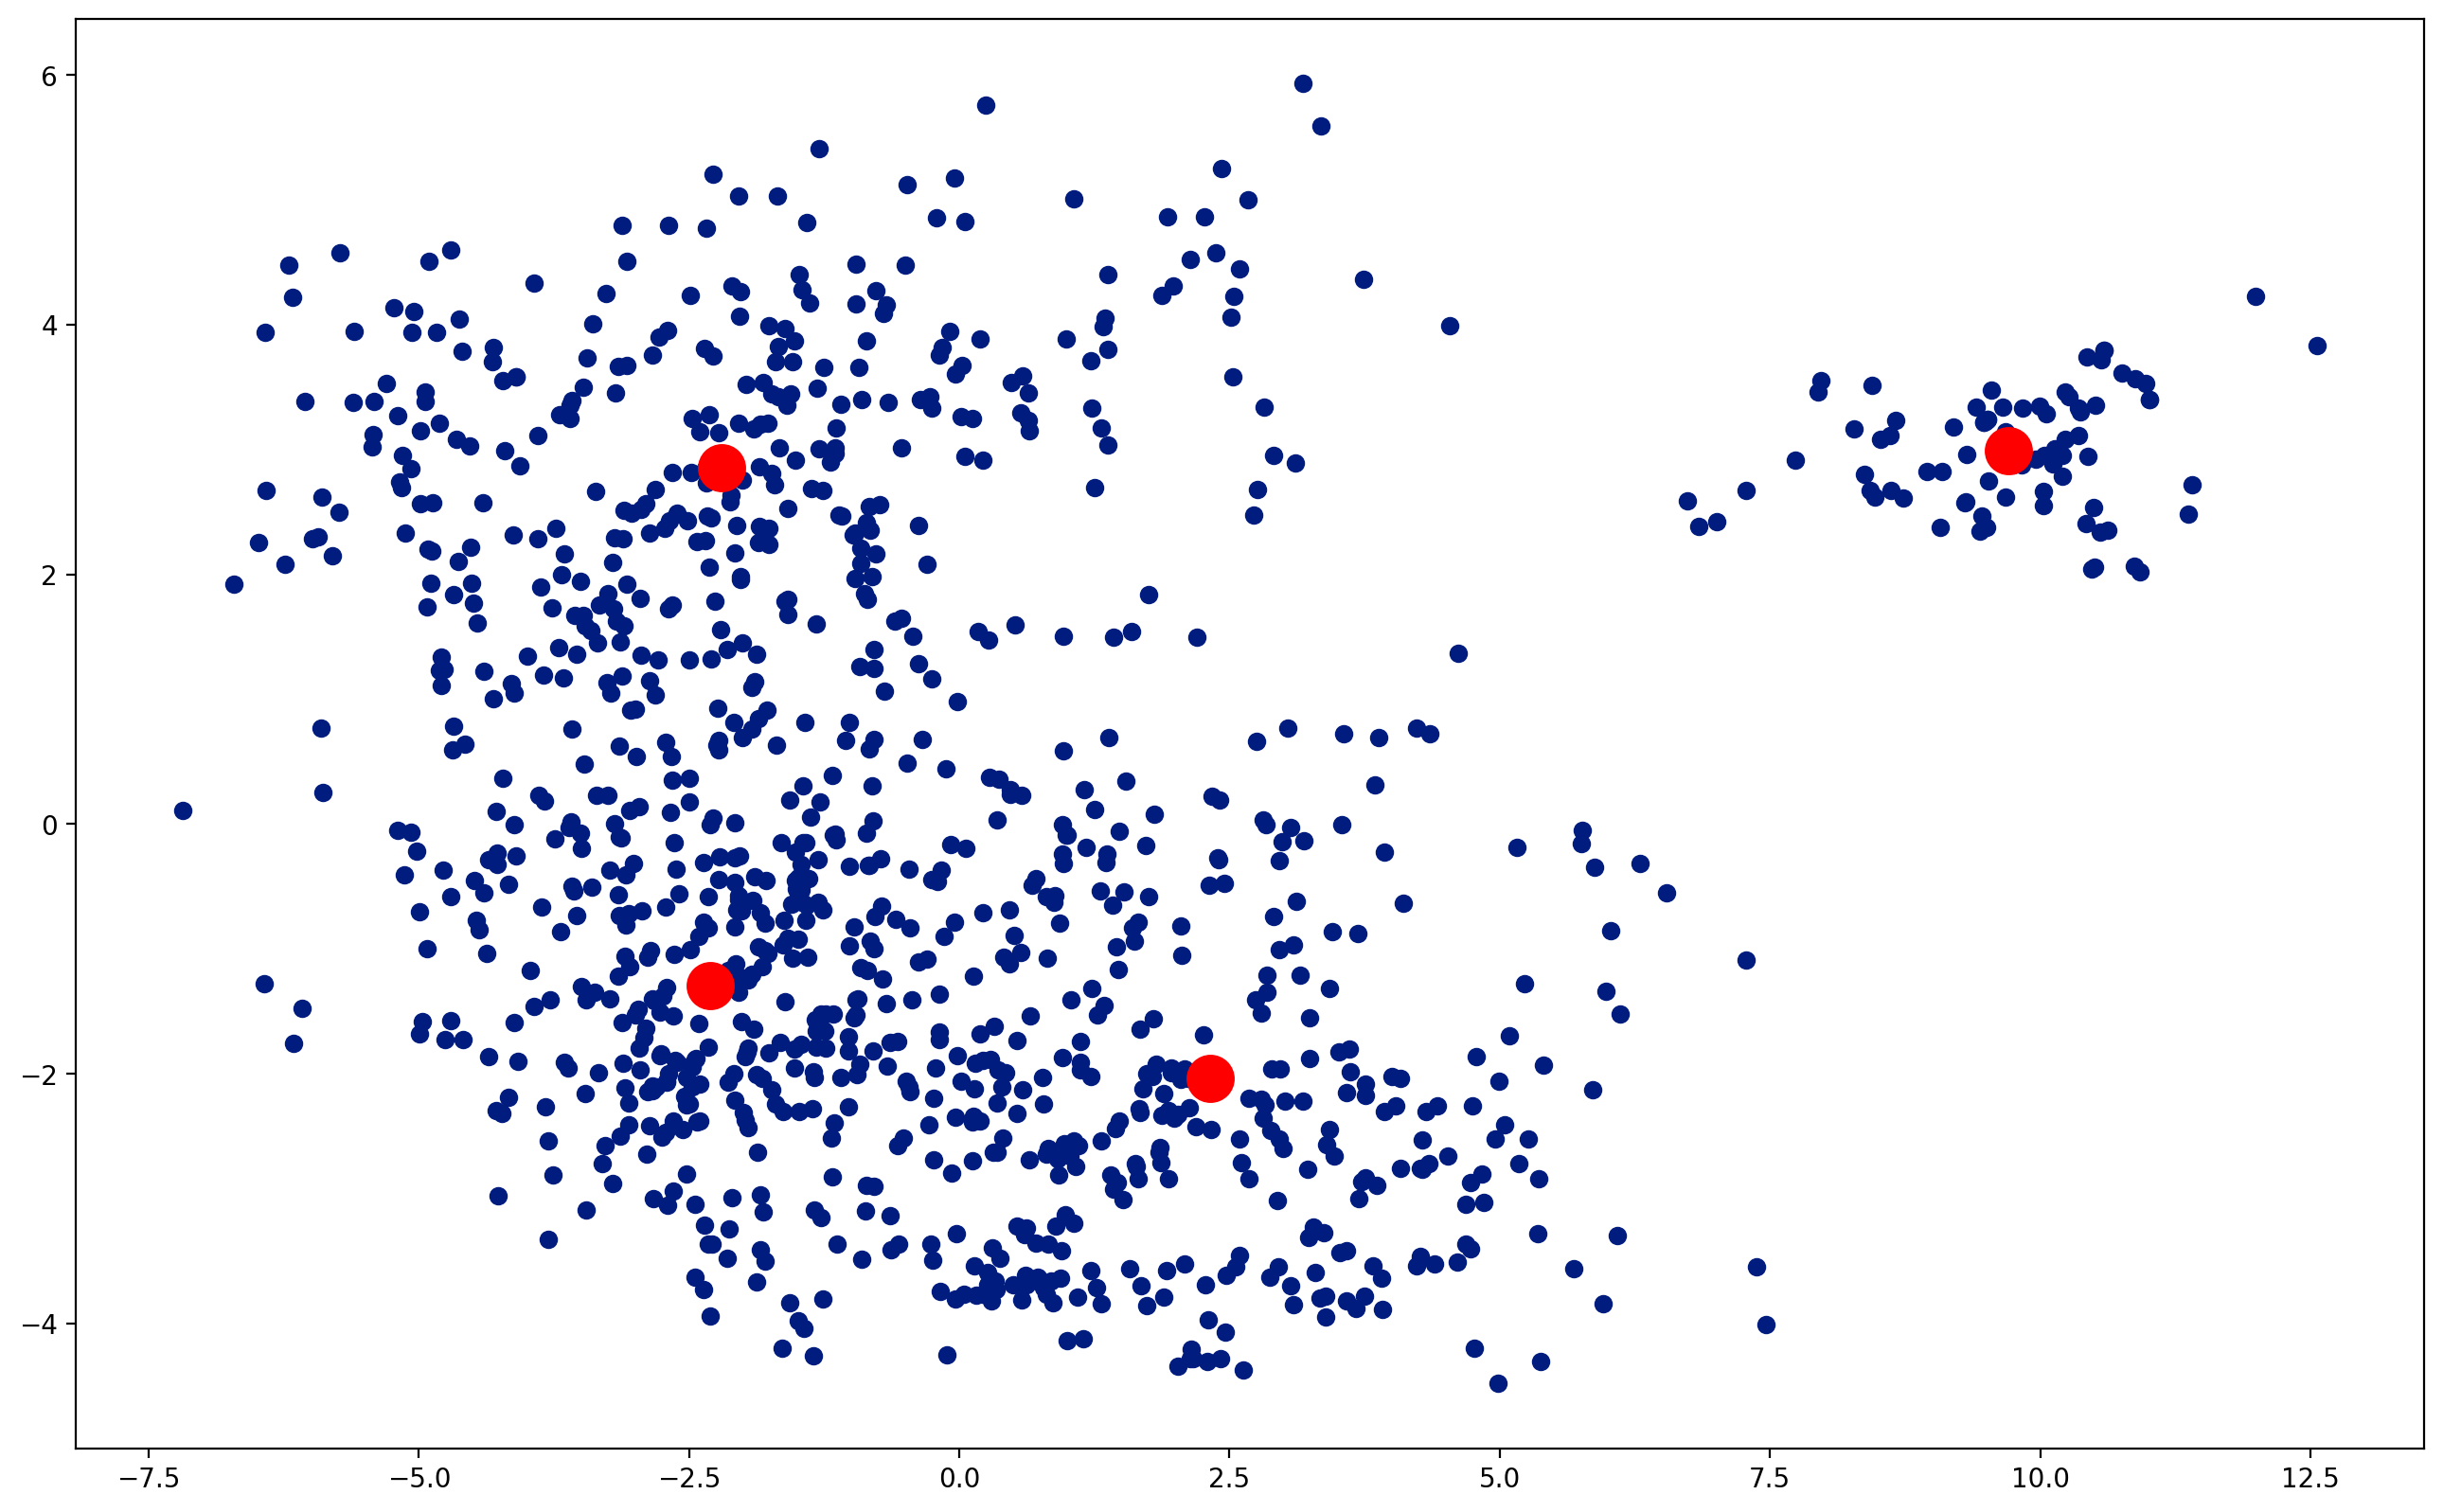

In [153]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.figure(figsize=(16, 10), dpi=200)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [154]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.025179856115107913


In [158]:
X = pca.transform(train_feat)
print(X)

[[ 0.16000158 -3.77710091  0.6162919  ...  0.73875817  0.99604922
  -0.38599117]
 [ 0.03908343 -3.76664063  1.31533698 ...  0.74349833  1.17808181
  -0.33243968]
 [ 0.22121722 -3.76977302  1.50062364 ...  0.50786968  0.92124337
  -0.55145714]
 ...
 [11.0124587   3.40070274  1.23808472 ... -0.53609123 -0.93850085
  -0.85671439]
 [11.99588961  4.22594268 -0.70268204 ...  0.82519533 -0.66361853
  -0.38271335]
 [12.56617304  3.83067939 -0.22815687 ...  0.93819746  0.09006552
  -0.69851436]]


In [168]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np
X = pca.transform(train_feat)
y = pca.transform(train['player_position_value'])
X.reshape(1, -1)
y.reshape(1, -1)
clf = NearestCentroid()
clf.fit(X, y)
NearestCentroid(metric='euclidean', shrink_threshold=None)
print(clf.predict([[-0.8, -1]]))
[1]

ValueError: Expected 2D array, got 1D array instead:
array=[2. 2. 2. ... 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.